## Import Necessary Libraries 

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys


## Import Data set

In [59]:
data=pd.read_csv("..\Dataset\df_limpio.csv")

In [60]:
data.head()

,Fecha_emision,Fecha_expiracion,Emision_CO2,Clasificacion_Emisiones,ConsumoKWh/m2/Anio,Clasificacion_consumo,Tipo_edificio,Estado_edificio,Anio_construccion,Superficie_m2,Municipio,Provincia,Coordenadas_gps,Anio_emision,Dias_hasta_expiracion
0,2013-06-29,2023-06-29,30.11,E,142.33,E,Vivienda individual,Existente,1962,49.0,ZARAGOZA,ZARAGOZA,"674903,68 , 4612931,37",2013,3652
1,2013-09-26,2023-09-26,46.06,E,174.42,E,Vivienda individual,Existente,1974,81.0,ZARAGOZA,ZARAGOZA,"674062,96 , 4612970,24",2013,3652
2,2014-02-26,2024-02-26,20.30,D,94.16,D,Vivienda individual,Existente,1999,72.0,ZARAGOZA,ZARAGOZA,"671872,34 , 4612101,81",2014,3652
3,2013-06-12,2023-06-12,39.21,E,187.66,E,Vivienda individual,Existente,1970,65.0,ZARAGOZA,ZARAGOZA,"676128,95 , 4613401,52",2013,3652
4,2013-06-27,2023-06-27,103.75,G,409.03,G,Vivienda individual,Existente,1965,46.0,ZARAGOZA,ZARAGOZA,"674806,83 , 4613067,64",2013,3652


In [61]:
data.columns

Index(['Fecha_emision', 'Fecha_expiracion', 'Emision_CO2',
       'Clasificacion_Emisiones', 'ConsumoKWh/m2/Anio',
       'Clasificacion_consumo', 'Tipo_edificio', 'Estado_edificio',
       'Anio_construccion', 'Superficie_m2', 'Municipio', 'Provincia',
       'Coordenadas_gps', 'Anio_emision', 'Dias_hasta_expiracion'],
      dtype='object')

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179852 entries, 0 to 179851
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Fecha_emision            179852 non-null  object 
 1   Fecha_expiracion         179852 non-null  object 
 2   Emision_CO2              179852 non-null  float64
 3   Clasificacion_Emisiones  179852 non-null  object 
 4   ConsumoKWh/m2/Anio       179852 non-null  float64
 5   Clasificacion_consumo    179852 non-null  object 
 6   Tipo_edificio            179852 non-null  object 
 7   Estado_edificio          179852 non-null  object 
 8   Anio_construccion        179852 non-null  int64  
 9   Superficie_m2            179852 non-null  float64
 10  Municipio                179852 non-null  object 
 11  Provincia                179852 non-null  object 
 12  Coordenadas_gps          179852 non-null  object 
 13  Anio_emision             179852 non-null  int64  
 14  Dias

## Data Preprocessing

#### Checking for is there is any null values are present

In [63]:
data.isna().sum()

Fecha_emision              0
Fecha_expiracion           0
Emision_CO2                0
Clasificacion_Emisiones    0
ConsumoKWh/m2/Anio         0
Clasificacion_consumo      0
Tipo_edificio              0
Estado_edificio            0
Anio_construccion          0
Superficie_m2              0
Municipio                  0
Provincia                  0
Coordenadas_gps            0
Anio_emision               0
Dias_hasta_expiracion      0
dtype: int64

#### Checking for is there is any duplicate values are present

In [64]:
duplicate_row=data.duplicated().sum()

if duplicate_row==0:
   print('No duplicate rows found.')
else:
   print('Number of duplicate rows are :')
   print(duplicate_row)

Number of duplicate rows are :
24364


In [65]:
# Removing Duplicates values

data=data.drop_duplicates()
                                 # Checking if there is any duplicates are present!!
duplicate_row=data.duplicated().sum()

if duplicate_row==0:
   print('No duplicate rows found.')
else:
   print('Number of duplicate rows are :')
   print(duplicate_row)
print("Shape of the data set:")
print(data.shape)

No duplicate rows found.
Shape of the data set:
(155488, 15)


##### Rename Columns

In [66]:
data=data.rename(columns={'Fecha_emision':'Emission_date',
                         'Fecha_expiracion':'Expiration_date',
                         'Emision_CO2':'CO2_emission',
       'Clasificacion_Emisiones':'Emission_classification',
                         'ConsumoKWh/m2/Anio':'Consumption_KWh_per_m2_per_year',
                         
       'Clasificacion_consumo':'Consumption_classification', 
                         'Tipo_edificio':'Building_type',
                         'Estado_edificio':'Building_condition',
       'Anio_construccion':'Year_of_construction',
                         'Superficie_m2':'Surface_area_m2',
                         'Municipio':'Municipality',
                         'Provincia':'Province',
       'Coordenadas_gps':'GPS_coordinates',
                         'Anio_emision':'Emission_year', 
                         'Dias_hasta_expiracion':'Days_until_expiration'
})

In [67]:
data.head(5)

,Emission_date,Expiration_date,CO2_emission,Emission_classification,Consumption_KWh_per_m2_per_year,Consumption_classification,Building_type,Building_condition,Year_of_construction,Surface_area_m2,Municipality,Province,GPS_coordinates,Emission_year,Days_until_expiration
0,2013-06-29,2023-06-29,30.11,E,142.33,E,Vivienda individual,Existente,1962,49.0,ZARAGOZA,ZARAGOZA,"674903,68 , 4612931,37",2013,3652
1,2013-09-26,2023-09-26,46.06,E,174.42,E,Vivienda individual,Existente,1974,81.0,ZARAGOZA,ZARAGOZA,"674062,96 , 4612970,24",2013,3652
2,2014-02-26,2024-02-26,20.30,D,94.16,D,Vivienda individual,Existente,1999,72.0,ZARAGOZA,ZARAGOZA,"671872,34 , 4612101,81",2014,3652
3,2013-06-12,2023-06-12,39.21,E,187.66,E,Vivienda individual,Existente,1970,65.0,ZARAGOZA,ZARAGOZA,"676128,95 , 4613401,52",2013,3652
4,2013-06-27,2023-06-27,103.75,G,409.03,G,Vivienda individual,Existente,1965,46.0,ZARAGOZA,ZARAGOZA,"674806,83 , 4613067,64",2013,3652


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155488 entries, 0 to 179851
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Emission_date                    155488 non-null  object 
 1   Expiration_date                  155488 non-null  object 
 2   CO2_emission                     155488 non-null  float64
 3   Emission_classification          155488 non-null  object 
 4   Consumption_KWh_per_m2_per_year  155488 non-null  float64
 5   Consumption_classification       155488 non-null  object 
 6   Building_type                    155488 non-null  object 
 7   Building_condition               155488 non-null  object 
 8   Year_of_construction             155488 non-null  int64  
 9   Surface_area_m2                  155488 non-null  float64
 10  Municipality                     155488 non-null  object 
 11  Province                         155488 non-null  object 
 12  GPS_coo

In [69]:
data['Municipality'].unique()

array(['ZARAGOZA', 'MUEL', 'PUEBLA DE ALFINDEN', 'VERA DE MONCAYO',
       'VILLANUEVA DE GALLEGO', 'CALATORAO', 'RICLA', 'ALAGON', 'CADRETE',
       'FABARA', 'FRAGA', 'BRONCHALES', 'CALATAYUD', 'LA MUELA',
       'BIESCAS', 'TERUEL', 'VILLANUEVA DE HUERVA', 'TRASMOZ', 'HUESCA',
       'MONZON', 'ZUERA', 'EJEA DE LOS CABALLEROS', 'CUARTE DE HUERVA',
       'ALCAMPELL', 'UTEBO', 'CASTEJON DE SOS', 'TIERZ', 'CEDRILLAS',
       'VILLAFRANCA DE EBRO', 'TORRIJO DEL CAMPO', 'CALAMOCHA',
       'BENASQUE', 'BARBASTRO', 'MAZALEON', 'FUENTES DE EBRO',
       'LA PUEBLA DE HIJAR', 'AISA', 'JACA', 'MONREAL DEL CAMPO',
       'MARIA DE HUERVA', 'SALLENT DE GALLEGO', 'JARQUE', 'GALLUR',
       'NUEZ DE EBRO', 'PINSEQUE', 'RUBIELOS DE MORA', 'FUENTES CLARAS',
       'CASPE', 'VILLANUA', 'EL BURGO DE EBRO', 'ALCAÑIZ',
       'MORA DE RUBIELOS', 'TARDIENTA', 'ALBALATE DE CINCA',
       'LA ALMUNIA DE DOÑA GODINA', 'CANFRANC', 'PEDROLA', 'QUINTO',
       'ANDORRA', 'PANTICOSA', 'PASTRIZ', 'BINEFAR', '

In [70]:
data['Province'].unique()

array(['ZARAGOZA', 'HUESCA', 'TERUEL'], dtype=object)

Zaragoza, Huesca, and Teruel are provinces in the autonomous community of Aragon, located in the country of Spain.

Creating new columns (Day, Month, Year) based on Emission_date column


In [71]:
# Convert 'Emission_date' to datetime format
data['Emission_date'] = pd.to_datetime(data['Emission_date'], format='ISO8601')

# Create separate columns for year, month, and day
data['year'] = data['Emission_date'].dt.year
data['month'] = data['Emission_date'].dt.month
data['day'] = data['Emission_date'].dt.day

# Display the updated DataFrame
data

,Emission_date,Expiration_date,CO2_emission,Emission_classification,Consumption_KWh_per_m2_per_year,Consumption_classification,Building_type,Building_condition,Year_of_construction,Surface_area_m2,Municipality,Province,GPS_coordinates,Emission_year,Days_until_expiration,year,month,day
0,2013-06-29,2023-06-29,30.11,E,142.33,E,Vivienda individual,Existente,1962,49.00,ZARAGOZA,ZARAGOZA,"674903,68 , 4612931,37",2013,3652,2013,6,29
1,2013-09-26,2023-09-26,46.06,E,174.42,E,Vivienda individual,Existente,1974,81.00,ZARAGOZA,ZARAGOZA,"674062,96 , 4612970,24",2013,3652,2013,9,26
2,2014-02-26,2024-02-26,20.30,D,94.16,D,Vivienda individual,Existente,1999,72.00,ZARAGOZA,ZARAGOZA,"671872,34 , 4612101,81",2014,3652,2014,2,26
3,2013-06-12,2023-06-12,39.21,E,187.66,E,Vivienda individual,Existente,1970,65.00,ZARAGOZA,ZARAGOZA,"676128,95 , 4613401,52",2013,3652,2013,6,12
4,2013-06-27,2023-06-27,103.75,G,409.03,G,Vivienda individual,Existente,1965,46.00,ZARAGOZA,ZARAGOZA,"674806,83 , 4613067,64",2013,3652,2013,6,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179847,2023-12-26,2028-12-26,179.85,G,1015.16,G,Local,Existente,1965,25.42,ZARAGOZA,ZARAGOZA,"677013,06 , 4611529,93",2023,1827,2023,12,26
179848,2023-11-24,2033-12-20,18.68,B,86.84,B,Unifamiliar,Proyecto Reforma,2013,329.99,ZARAGOZA,ZARAGOZA,"673883,66 , 4610716,33",2023,3679,2023,11,24
179849,2023-12-22,2033-12-22,42.27,E,202.82,E,Vivienda individual,Existente,1977,100.86,ZARAGOZA,ZARAGOZA,"674059,02 , 4613464,77",2023,3653,2023,12,22
179850,2023-12-23,2033-12-23,40.00,C,236.15,D,Local,Existente,2007,93.00,MORA DE RUBIELOS,TERUEL,"690986,45 , 4457882,06",2023,3653,2023,12,23


In [72]:
data['Emission_year'].unique()

array([2013, 2014, 2012, 2002, 2015, 2011, 2004, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 1913, 2009, 2010, 2007])

In [73]:
data['year'].unique()

array([2013, 2014, 2012, 2002, 2015, 2011, 2004, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023, 1913, 2009, 2010, 2007], dtype=int32)

### EDA

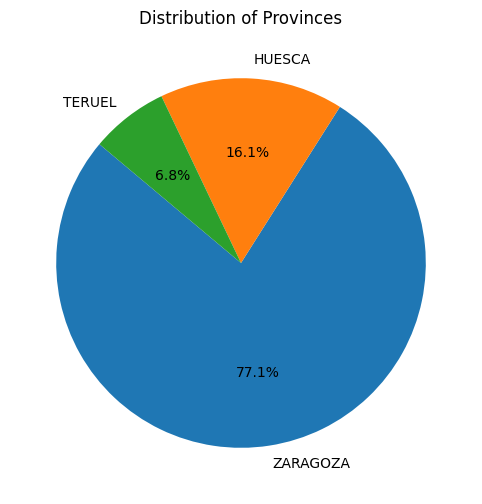

In [74]:
province_counts = data['Province'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(province_counts, labels=province_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Provinces')
plt.show()

In [75]:
group_by=data.groupby('year')['Province'].count()
print(group_by)

year
1913        1
2002        1
2004        2
2007        1
2009        2
2010        1
2011        4
2012       25
2013     8458
2014    15036
2015    17322
2016    14927
2017    14858
2018    13739
2019    13589
2020    10688
2021    13696
2022    16378
2023    16760
Name: Province, dtype: int64


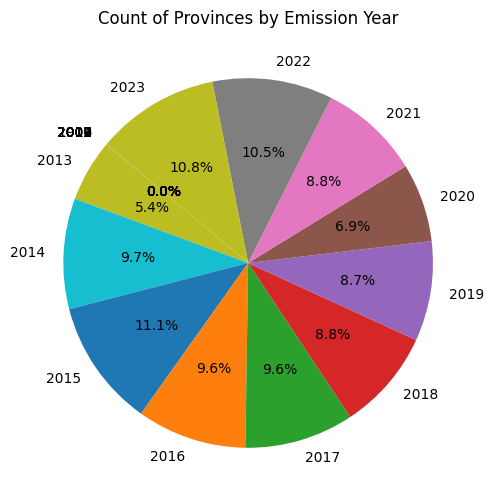

In [76]:
plt.figure(figsize=(8, 6))
plt.pie(group_by, labels=group_by.index, autopct='%1.1f%%', startangle=140)
plt.title('Count of Provinces by Emission Year')
plt.show()

Filtering out data points from the 'year' column where data coverage is less than 10% (1913 - 2012).

In [77]:
#Drop rows where 'Emission_year' is between 1913 and 2012
data = data[~data['Emission_year'].between(1913, 2012)]

# After filtering, reset index if necessary
data = data.reset_index(drop=True)

In [78]:
group_by=data.groupby('year')['Province'].count()
print(group_by)

year
2013     8458
2014    15036
2015    17322
2016    14927
2017    14858
2018    13739
2019    13589
2020    10688
2021    13696
2022    16378
2023    16760
Name: Province, dtype: int64


In [79]:
list1= data['Emission_date'].unique()
print(list1)

<DatetimeArray>
['2013-06-29 00:00:00', '2013-09-26 00:00:00', '2014-02-26 00:00:00',
 '2013-06-12 00:00:00', '2013-06-27 00:00:00', '2013-06-17 00:00:00',
 '2014-02-13 00:00:00', '2014-04-08 00:00:00', '2014-04-07 00:00:00',
 '2013-12-16 00:00:00',
 ...
 '2021-03-02 23:11:31', '2021-03-13 18:37:44', '2021-02-25 09:10:55',
 '2021-06-29 12:08:01', '2021-04-12 12:36:53', '2021-02-11 14:56:27',
 '2021-03-07 12:11:52', '2021-03-16 17:59:44', '2021-02-16 11:17:27',
 '2023-12-23 00:00:00']
Length: 6771, dtype: datetime64[ns]


In [80]:
print(len(list1))

6771


changing data type of Date

In [81]:
data['Emission_date'].dtype

dtype('<M8[ns]')

In [82]:
data['Emission_date']= pd.to_datetime(data['Emission_date'], format='%Y-%m-%d')
data['Emission_date']

0        2013-06-29
1        2013-09-26
2        2014-02-26
3        2013-06-12
4        2013-06-27
            ...    
155446   2023-12-26
155447   2023-11-24
155448   2023-12-22
155449   2023-12-23
155450   2023-12-27
Name: Emission_date, Length: 155451, dtype: datetime64[ns]

In [86]:
data.shape

(155451, 18)

In [91]:
date_count=len(list(data['Emission_date'].unique()))
date_count

6771